In [2]:
import os
import numpy as np
import random
import pickle
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
2023-10-28 14:41:43.013679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
with open('../data/external/data.pkl','rb') as f:
    X_train,y_train,X_test,y_test, X_valid, y_valid = pickle.load(f)
    
# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (575, 224, 224, 3)
y_train shape: (575,)
X_valid shape: (144, 224, 224, 3)
y_valid shape: (144,)
X_test shape: (180, 224, 224, 3)
y_test shape: (180,)


In [13]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
    #rescale=1.0 / 255  # Add normalization here
)

In [14]:
# Apply data augmentation to the training set
X_train_augmented = []
y_train_augmented = []
for i in range(X_train.shape[0]):
    img = X_train[i]
    label = y_train[i]
    for j in range(5):
        x_augmented = datagen.random_transform(img)
        X_train_augmented.append(x_augmented)
        y_train_augmented.append(label)

In [15]:
# Apply data augmentation to the test set
X_test_augmented = []
y_test_augmented = []
for i in range(X_test.shape[0]):
    img = X_test[i]
    label = y_test[i]
    for j in range(5):
        x_augmented = datagen.random_transform(img)
        X_test_augmented.append(x_augmented)
        y_test_augmented.append(label)

In [16]:
# Apply data augmentation to the test set
X_valid_augmented = []
y_valid_augmented = []
for i in range(X_valid.shape[0]):
    img = X_valid[i]
    label = y_valid[i]
    for j in range(5):
        x_augmented = datagen.random_transform(img)
        X_valid_augmented.append(x_augmented)
        y_valid_augmented.append(label)

In [17]:
# Convert the augmented data to numpy arrays
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
X_test_augmented = np.array(X_test_augmented)
y_test_augmented = np.array(y_test_augmented)
X_valid_augmented = np.array(X_valid_augmented)
y_valid_augmented = np.array(y_valid_augmented)

In [18]:
# Combine the data
X_train_combined = np.concatenate((X_train, X_train_augmented), axis=0)
y_train_combined = np.concatenate((y_train, y_train_augmented), axis=0)
X_test_combined = np.concatenate((X_test, X_test_augmented), axis=0)
y_test_combined = np.concatenate((y_test, y_test_augmented), axis=0)
X_valid_combined = np.concatenate((X_valid, X_valid_augmented), axis=0)
y_valid_combined = np.concatenate((y_valid, y_valid_augmented), axis=0)

# Check the shape of the combined data
print(f'X_train_combined shape: {X_train_combined.shape}')
print(f'y_train_combined shape: {y_train_combined.shape}')
print(f'X_test_combined shape: {X_test_combined.shape}')
print(f'y_test_combined shape: {y_test_combined.shape}')
print(f'X_valid_combined shape: {X_valid_combined.shape}')
print(f'y_valid_combined shape: {y_valid_combined.shape}')

X_train_combined shape: (3450, 224, 224, 3)
y_train_combined shape: (3450,)
X_test_combined shape: (1080, 224, 224, 3)
y_test_combined shape: (1080,)
X_valid_combined shape: (864, 224, 224, 3)
y_valid_combined shape: (864,)


In [19]:
# Save the augmented data to files
np.savez_compressed('../data/external/coral_augmented_combined_vgg16_imbalaned.npz',
                    X_train=X_train_combined,
                    y_train=y_train_combined,
                    X_test=X_test_combined,
                    y_test=y_test_combined,
                    X_valid=X_valid_combined,
                    y_valid=y_valid_combined)

In [10]:
# Load the augmented data from the saved file
data = np.load('../data/external/coral_augmented_combined_vgg16_imbalaned.npz')

# Access the arrays from the loaded data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
X_valid = data['X_valid']
y_valid = data['y_valid']

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3450, 224, 224, 3)
y_train shape: (3450,)
X_valid shape: (864, 224, 224, 3)
y_valid shape: (864,)
X_test shape: (1080, 224, 224, 3)
y_test shape: (1080,)


In [4]:
# Define the data augmentation parameters with increased intensity
datagen = ImageDataGenerator(
    rotation_range=30,           # Increase the rotation range
    zoom_range=0.2,              # Increase the zoom range
    width_shift_range=0.2,       # Increase the width shift range
    height_shift_range=0.2,      # Increase the height shift range
    shear_range=0.2,             # Increase the shear range
    brightness_range=[0.2, 2.0],  # Adjust the brightness range
    fill_mode='nearest')


In [5]:
# Apply data augmentation to the training set
X_train_augmented = []
y_train_augmented = []
for i in range(X_train.shape[0]):
    img = X_train[i]
    label = y_train[i]
    for j in range(5):
        x_augmented = datagen.random_transform(img)
        X_train_augmented.append(x_augmented)
        y_train_augmented.append(label)

In [6]:
# Apply data augmentation to the test set
X_test_augmented = []
y_test_augmented = []
for i in range(X_test.shape[0]):
    img = X_test[i]
    label = y_test[i]
    for j in range(5):
        x_augmented = datagen.random_transform(img)
        X_test_augmented.append(x_augmented)
        y_test_augmented.append(label)

In [7]:
# Apply data augmentation to the test set
X_valid_augmented = []
y_valid_augmented = []
for i in range(X_valid.shape[0]):
    img = X_valid[i]
    label = y_valid[i]
    for j in range(5):
        x_augmented = datagen.random_transform(img)
        X_valid_augmented.append(x_augmented)
        y_valid_augmented.append(label)

In [8]:
# Convert the augmented data to numpy arrays
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
X_test_augmented = np.array(X_test_augmented)
y_test_augmented = np.array(y_test_augmented)
X_valid_augmented = np.array(X_valid_augmented)
y_valid_augmented = np.array(y_valid_augmented)

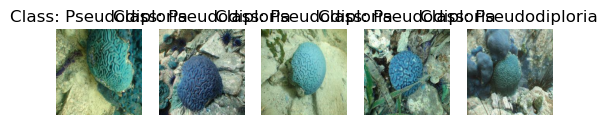

In [11]:
import matplotlib.pyplot as plt

# Define the number of images to display
num_images_to_display = 5

# Loop through the training data and display the first num_images_to_display images
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    
    # Normalize the image data to the [0, 1] range
    normalized_image = X_train[i] / 255.0  # If the original data is in [0, 255] range
    
    plt.imshow(normalized_image)
    plt.title(f"Class: {y_train[i]}")
    plt.axis('off')

plt.show()


In [13]:
import matplotlib.pyplot as plt
import random

# Define the classes you want to display
class_1 = 0  # Change this to the first class you want to display
class_2 = 1  # Change this to the second class you want to display

# Find indices of images in the specified classes
class_1_indices = [i for i, label in enumerate(y_train) if label == class_1]
class_2_indices = [i for i, label in enumerate(y_train) if label == class_2]

# Determine the number of images available for each class
num_class_1_images = len(class_1_indices)
num_class_2_images = len(class_2_indices)

# Set the number of images to display per class to the minimum of available images
num_images_per_class = min(num_class_1_images, num_class_2_images)

# Randomly select images from each class
class_1_selected_indices = random.sample(class_1_indices, num_images_per_class)
class_2_selected_indices = random.sample(class_2_indices, num_images_per_class)

# Create subplots for the selected images
plt.figure(figsize=(12, 6))

for i, idx in enumerate(class_1_selected_indices + class_2_selected_indices):
    plt.subplot(2, num_images_per_class, i + 1)
    
    # Normalize the image data to the [0, 1] range
    normalized_image = X_train[idx] / 255.0
    
    plt.imshow(normalized_image)
    plt.title(f"Class: {y_train[idx]}")
    plt.axis('off')

plt.show()


<Figure size 1200x600 with 0 Axes>